In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import argparse

In [ ]:
def plot_one_policy(p_h, policy):
    Y = [ x[0] for x in policy[1:-1]  ]
    X = np.arange(1, 1+len(Y))
  
    plt.xlabel("Capital")
    plt.ylabel("Stake")
    plt.title(f"Final Policy for p_h = {p_h}")
  
    plt.plot(X, Y)
    plt.show()
    #plt.savefig(f"Policy-ph={p_h}.png")
    #plt.close()

def plot_value_fn(p_h, values):
    Y = values[1:-1]
    X = np.arange(1, 1+len(Y))

    plt.xlabel("Capital")
    plt.ylabel("Value Estimates")
    plt.title(f"Value Function for p_h = {p_h}")

    plt.plot(X, Y)
    plt.show()
    #plt.savefig(f"V-ph={p_h}.png")
    #plt.close()

In [53]:
def value_iteration(p_h, num_iters, target, threshold):
    values = np.zeros(target+1)
    values[target] = 1.0
    for i in range(num_iters):
        dummy_values = values.copy()
        max_val = 0
        for state in range(1,target):
            min_bet = 1
            max_bet = min(state, target - state)
            for action in range(min_bet, max_bet+1):
                curr_value = values[state]
                dummy_values[state] = max(dummy_values[state],p_h*(values[state + action]) + (1 - p_h)*(values[state - action]))
                max_val = max(max_val,dummy_values[state] - curr_value)
        values = dummy_values.copy()    
        if max_val < threshold:
                break
    
    if i == (num_iters-1):
        print("Value iteration did not converge :(")

    return values


In [39]:
def get_policies(p_h, values, target, threshold):
    policy = []
    for i in values:
        policy.append([])

    for state in range(1, target):
        min_state = 1
        max_state = min(state, target - state)
        max_val = -1
        best_action = -1;
        for action in range(min_state, max_state+1):
            val = values[state + action] * p_h + values[state - action] * (1 - p_h)
            if abs(val - values[state]) < threshold:
                policy[state].append(action)
            if val > max_val:
                max_val = val
                best_action = action
        
        if len(policy[state]) == 0:
            policy[state].append(best_action)

    return policy

          

For $p_h = 0.4$ 

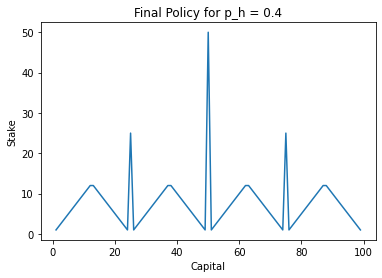

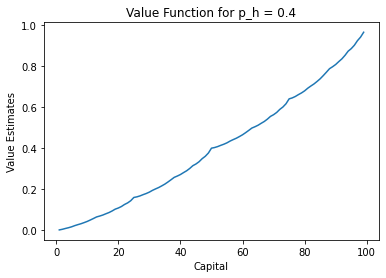

In [65]:
p_h = 0.4
num_iters = 1000
threshold = 1e-9
target = 100
values = value_iteration(p_h, num_iters, target, threshold)
policies = get_policies(p_h, values, target, threshold)
plot_one_policy(p_h, policies)
plot_value_fn(p_h,values)
with open('/content/drive/My Drive/Semester3/DRL/Assignment1/Policies-ph-0.40.txt', 'w') as f:
		for i, p in enumerate(policies[1:-1]):
				f.write(f"{i+1}: {p}\n")

For $p_h = 0.25$ 

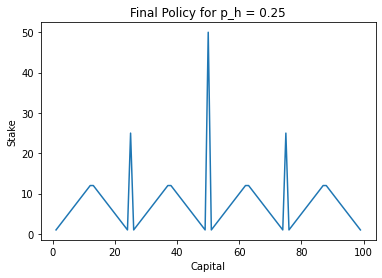

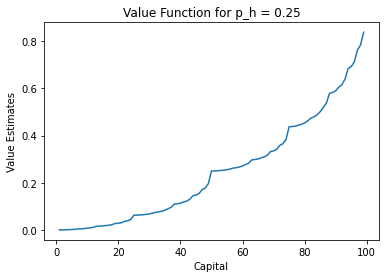

In [64]:
p_h = 0.25
num_iters = 100
threshold = 1e-9
target = 100
values = value_iteration(p_h, num_iters, target, threshold)
policies = get_policies(p_h, values, target, threshold)
plot_one_policy(p_h, policies)
plot_value_fn(p_h,values)
with open('/content/drive/My Drive/Semester3/DRL/Assignment1/Policies-ph-0.25.txt', 'w') as f:
		for i, p in enumerate(policies[1:-1]):
				f.write(f"{i+1}: {p}\n")

For $p_h = 0.55$ 

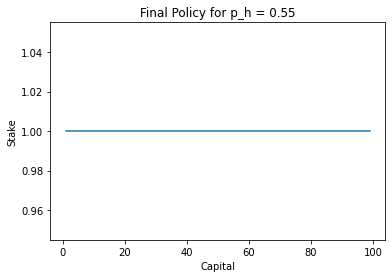

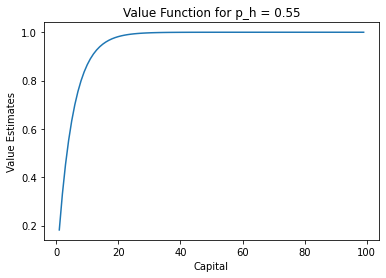

In [63]:
p_h = 0.55
num_iters = 5000
threshold = 1e-9
target = 100
values = value_iteration(p_h, num_iters, target, threshold)
policies = get_policies(p_h, values, target, threshold)
plot_one_policy(p_h, policies)
plot_value_fn(p_h,values)
with open('/content/drive/My Drive/Semester3/DRL/Assignment1/Policies-ph-0.55.txt', 'w') as f:
		for i, p in enumerate(policies[1:-1]):
				f.write(f"{i+1}: {p}\n")